In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [0]:
from matplotlib import pyplot as plt
from IPython.display import FileLink
import seaborn as sns

In [17]:
!pwd
!ls -l
!ls -lR ../input/

/content/working
total 0
../input/:
total 4
drwxr-xr-x 2 root root 4096 Oct  3 19:52 mlcourse-ai-fall-2019-catboost

../input/mlcourse-ai-fall-2019-catboost:
total 1083968
-rw-r--r-- 1 root root 241324248 Oct  3 19:52 test.cbm
-rw-r--r-- 1 root root 352700578 Oct  3 19:52 test.h5
-rw-r--r-- 1 root root 163004316 Oct  3 19:52 train.cbm
-rw-r--r-- 1 root root 352943584 Oct  3 19:52 train.h5


**Read the data**

In [0]:
train_df = pd.read_hdf('../input/mlcourse-ai-fall-2019-catboost/train.h5')
test_df = pd.read_hdf('../input/mlcourse-ai-fall-2019-catboost/test.h5')

In [19]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,...,Origin_DepHourRange_ArrHourRange,Origin_DepHourRange_ArrMinRange,Origin_DepMinRange_ArrHourRange,Origin_DepMinRange_ArrMinRange,Origin_ArrHourRange_ArrMinRange,Dest_DepHour_ArrHour,Dest_DepHour_DepHourRange,Dest_DepHour_DepMinRange,Dest_DepHour_ArrHourRange,Dest_DepHour_ArrMinRange,Dest_ArrHour_DepHourRange,Dest_ArrHour_DepMinRange,Dest_ArrHour_ArrHourRange,Dest_ArrHour_ArrMinRange,Dest_DepHourRange_DepMinRange,Dest_DepHourRange_ArrHourRange,Dest_DepHourRange_ArrMinRange,Dest_DepMinRange_ArrHourRange,Dest_DepMinRange_ArrMinRange,Dest_ArrHourRange_ArrMinRange,DepHour_ArrHour_DepHourRange,DepHour_ArrHour_DepMinRange,DepHour_ArrHour_ArrHourRange,DepHour_ArrHour_ArrMinRange,DepHour_DepHourRange_DepMinRange,DepHour_DepHourRange_ArrHourRange,DepHour_DepHourRange_ArrMinRange,DepHour_DepMinRange_ArrHourRange,DepHour_DepMinRange_ArrMinRange,DepHour_ArrHourRange_ArrMinRange,ArrHour_DepHourRange_DepMinRange,ArrHour_DepHourRange_ArrHourRange,ArrHour_DepHourRange_ArrMinRange,ArrHour_DepMinRange_ArrHourRange,ArrHour_DepMinRange_ArrMinRange,ArrHour_ArrHourRange_ArrMinRange,DepHourRange_DepMinRange_ArrHourRange,DepHourRange_DepMinRange_ArrMinRange,DepHourRange_ArrHourRange_ArrMinRange,DepMinRange_ArrHourRange_ArrMinRange
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,34,19.566667,1.464,21.030667,19,21,2,2102,18-21,30-45,21-24,00-15,c-8_c-21_c-7,c-8_c-21_AA,c-8_c-21_ATL,c-8_c-21_DFW,c-8_c-21_19,c-8_c-21_21,c-8_c-21_18-21,c-8_c-21_30-45,c-8_c-21_21-24,c-8_c-21_00-15,c-8_c-7_AA,c-8_c-7_ATL,c-8_c-7_DFW,c-8_c-7_19,c-8_c-7_21,c-8_c-7_18-21,c-8_c-7_30-45,c-8_c-7_21-24,c-8_c-7_00-15,...,ATL_18-21_21-24,ATL_18-21_00-15,ATL_30-45_21-24,ATL_30-45_00-15,ATL_21-24_00-15,DFW_19_21,DFW_19_18-21,DFW_19_30-45,DFW_19_21-24,DFW_19_00-15,DFW_21_18-21,DFW_21_30-45,DFW_21_21-24,DFW_21_00-15,DFW_18-21_30-45,DFW_18-21_21-24,DFW_18-21_00-15,DFW_30-45_21-24,DFW_30-45_00-15,DFW_21-24_00-15,19_21_18-21,19_21_30-45,19_21_21-24,19_21_00-15,19_18-21_30-45,19_18-21_21-24,19_18-21_00-15,19_30-45_21-24,19_30-45_00-15,19_21-24_00-15,21_18-21_30-45,21_18-21_21-24,21_18-21_00-15,21_30-45_21-24,21_30-45_00-15,21_21-24_00-15,18-21_30-45_21-24,18-21_30-45_00-15,18-21_21-24_00-15,30-45_21-24_00-15
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,48,15.800000,1.668,17.468000,15,17,28,1728,15-18,45-60,15-18,15-30,c-4_c-20_c-3,c-4_c-20_US,c-4_c-20_PIT,c-4_c-20_MCO,c-4_c-20_15,c-4_c-20_17,c-4_c-20_15-18,c-4_c-20_45-60,c-4_c-20_15-18,c-4_c-20_15-30,c-4_c-3_US,c-4_c-3_PIT,c-4_c-3_MCO,c-4_c-3_15,c-4_c-3_17,c-4_c-3_15-18,c-4_c-3_45-60,c-4_c-3_15-18,c-4_c-3_15-30,...,PIT_15-18_15-18,PIT_15-18_15-30,PIT_45-60_15-18,PIT_45-60_15-30,PIT_15-18_15-30,MCO_15_17,MCO_15_15-18,MCO_15_45-60,MCO_15_15-18,MCO_15_15-30,MCO_17_15-18,MCO_17_45-60,MCO_17_15-18,MCO_17_15-30,MCO_15-18_45-60,MCO_15-18_15-18,MCO_15-18_15-30,MCO_45-60_15-18,MCO_45-60_15-30,MCO_15-18_15-30,15_17_15-18,15_17_45-60,15_17_15-18,15_17_15-30,15_15-18_45-60,15_15-18_15-18,15_15-18_15-30,15_45-60_15-18,15_45-60_15-30,15_15-18_15-30,17_15-18_45-60,17_15-18_15-18,17_15-18_15-30,17_45-60_15-18,17_45-60_15-30,17_15-18_15-30,15-18_45-60_15-18,15-18_45-60_15-30,15-18_15-18_15-30,45-60_15-18_15-30
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,22,14.366667,0.832,15.198667,14,15,12,1512,12-15,15-30,15-18,00-15,c-9_c-2_c-5,c-9_c-2_XE,c-9_c-2_RDU,c-9_c-2_CLE,c-9_c-2_14,c-

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 241 entries, Month to DepMinRange_ArrHourRange_ArrMinRange
dtypes: float64(3), int64(7), object(231)
memory usage: 184.6+ MB


In [21]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,Month_UniqueCarrier_Origin,...,Origin_DepHourRange_ArrHourRange,Origin_DepHourRange_ArrMinRange,Origin_DepMinRange_ArrHourRange,Origin_DepMinRange_ArrMinRange,Origin_ArrHourRange_ArrMinRange,Dest_DepHour_ArrHour,Dest_DepHour_DepHourRange,Dest_DepHour_DepMinRange,Dest_DepHour_ArrHourRange,Dest_DepHour_ArrMinRange,Dest_ArrHour_DepHourRange,Dest_ArrHour_DepMinRange,Dest_ArrHour_ArrHourRange,Dest_ArrHour_ArrMinRange,Dest_DepHourRange_DepMinRange,Dest_DepHourRange_ArrHourRange,Dest_DepHourRange_ArrMinRange,Dest_DepMinRange_ArrHourRange,Dest_DepMinRange_ArrMinRange,Dest_ArrHourRange_ArrMinRange,DepHour_ArrHour_DepHourRange,DepHour_ArrHour_DepMinRange,DepHour_ArrHour_ArrHourRange,DepHour_ArrHour_ArrMinRange,DepHour_DepHourRange_DepMinRange,DepHour_DepHourRange_ArrHourRange,DepHour_DepHourRange_ArrMinRange,DepHour_DepMinRange_ArrHourRange,DepHour_DepMinRange_ArrMinRange,DepHour_ArrHourRange_ArrMinRange,ArrHour_DepHourRange_DepMinRange,ArrHour_DepHourRange_ArrHourRange,ArrHour_DepHourRange_ArrMinRange,ArrHour_DepMinRange_ArrHourRange,ArrHour_DepMinRange_ArrMinRange,ArrHour_ArrHourRange_ArrMinRange,DepHourRange_DepMinRange_ArrHourRange,DepHourRange_DepMinRange_ArrMinRange,DepHourRange_ArrHourRange_ArrMinRange,DepMinRange_ArrHourRange_ArrMinRange
0,c-7,c-25,c-3,615,YV,MRY,PHX,598,15,6.250000,1.196,7.446000,6,7,27,727,06-09,15-30,06-09,15-30,c-7_c-25_c-3,c-7_c-25_YV,c-7_c-25_MRY,c-7_c-25_PHX,c-7_c-25_6,c-7_c-25_7,c-7_c-25_06-09,c-7_c-25_15-30,c-7_c-25_06-09,c-7_c-25_15-30,c-7_c-3_YV,c-7_c-3_MRY,c-7_c-3_PHX,c-7_c-3_6,c-7_c-3_7,c-7_c-3_06-09,c-7_c-3_15-30,c-7_c-3_06-09,c-7_c-3_15-30,c-7_YV_MRY,...,MRY_06-09_06-09,MRY_06-09_15-30,MRY_15-30_06-09,MRY_15-30_15-30,MRY_06-09_15-30,PHX_6_7,PHX_6_06-09,PHX_6_15-30,PHX_6_06-09,PHX_6_15-30,PHX_7_06-09,PHX_7_15-30,PHX_7_06-09,PHX_7_15-30,PHX_06-09_15-30,PHX_06-09_06-09,PHX_06-09_15-30,PHX_15-30_06-09,PHX_15-30_15-30,PHX_06-09_15-30,6_7_06-09,6_7_15-30,6_7_06-09,6_7_15-30,6_06-09_15-30,6_06-09_06-09,6_06-09_15-30,6_15-30_06-09,6_15-30_15-30,6_06-09_15-30,7_06-09_15-30,7_06-09_06-09,7_06-09_15-30,7_15-30_06-09,7_15-30_15-30,7_06-09_15-30,06-09_15-30_06-09,06-09_15-30_15-30,06-09_06-09_15-30,15-30_06-09_15-30
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235,39,7.650000,2.470,10.120000,7,10,7,1007,06-09,30-45,09-12,00-15,c-4_c-17_c-2,c-4_c-17_WN,c-4_c-17_LAS,c-4_c-17_HOU,c-4_c-17_7,c-4_c-17_10,c-4_c-17_06-09,c-4_c-17_30-45,c-4_c-17_09-12,c-4_c-17_00-15,c-4_c-2_WN,c-4_c-2_LAS,c-4_c-2_HOU,c-4_c-2_7,c-4_c-2_10,c-4_c-2_06-09,c-4_c-2_30-45,c-4_c-2_09-12,c-4_c-2_00-15,c-4_WN_LAS,...,LAS_06-09_09-12,LAS_06-09_00-15,LAS_30-45_09-12,LAS_30-45_00-15,LAS_09-12_00-15,HOU_7_10,HOU_7_06-09,HOU_7_30-45,HOU_7_09-12,HOU_7_00-15,HOU_10_06-09,HOU_10_30-45,HOU_10_09-12,HOU_10_00-15,HOU_06-09_30-45,HOU_06-09_09-12,HOU_06-09_00-15,HOU_30-45_09-12,HOU_30-45_00-15,HOU_09-12_00-15,7_10_06-09,7_10_30-45,7_10_09-12,7_10_00-15,7_06-09_30-45,7_06-09_09-12,7_06-09_00-15,7_30-45_09-12,7_30-45_00-15,7_09-12_00-15,10_06-09_30-45,10_06-09_09-12,10_06-09_00-15,10_30-45_09-12,10_30-45_00-15,10_09-12_00-15,06-09_30-45_09-12,06-09_30-45_00-15,06-09_09-12_00-15,30-45_09-12_00-15
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577,51,6.850000,1.154,8.004000,6,8,0,800,06-09,45-60,06-09,00-15,c-12_c-2_c-7,c-12_c-2_MQ,c-12_c-2_GSP,c-12_c-2_ORD,c-12_c-2_6,c-12_c-2_8,c-12_c-2_06-09,c-12_c-2_45-

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 240 entries, Month to DepMinRange_ArrHourRange_ArrMinRange
dtypes: float64(3), int64(7), object(230)
memory usage: 183.9+ MB


**EDA**

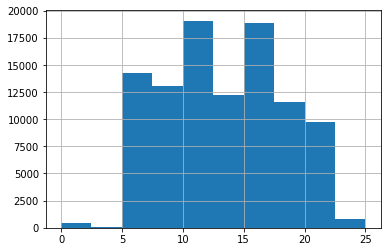

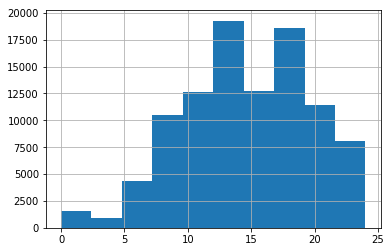

In [23]:
train_df['DepHour'].hist()
plt.show()
train_df['ArrHour'].hist()
plt.show()

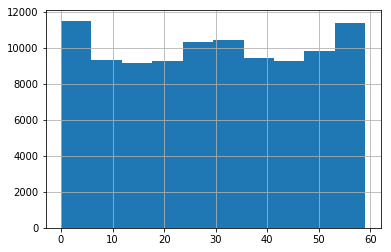

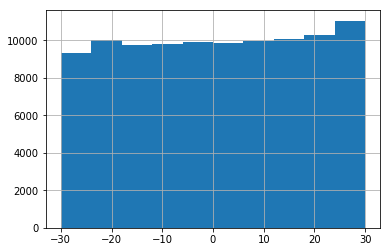

In [24]:
train_df['DepMin'].hist()
plt.show()
train_df['ArrMin'].hist()
plt.show()

CPU times: user 40.7 s, sys: 2.71 s, total: 43.4 s
Wall time: 40.3 s


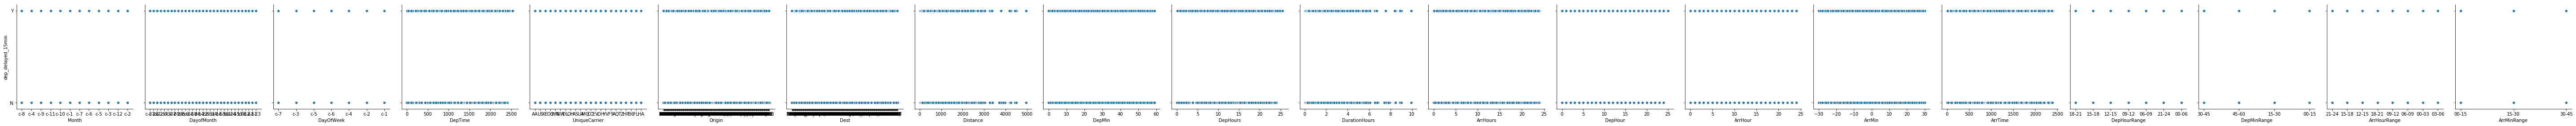

In [25]:
%%time
features = [x for x in train_df.columns if '_' not in x]
sns.pairplot(train_df, height=4, y_vars=['dep_delayed_15min'], x_vars=features)

**Allocate a hold-out set (a.k.a. a validation set) to validate the model**

In [26]:
X_train = train_df.drop('dep_delayed_15min', axis=1).values
y_train = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test_df.values
X_train.shape, X_test.shape, train_df.shape, test_df.shape

((100000, 240), (100000, 240), (100000, 241), (100000, 240))

In [27]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=17)
X_train_part.shape

(70000, 240)

**Train Catboost with default arguments, passing only the indexes of categorical features.**

In [0]:
ctb = CatBoostClassifier(random_seed=17)

In [29]:
ctb.load_model('../input/mlcourse-ai-fall-2019-catboost/train.cbm')

**We got some 0.756 ROC AUC on the hold-out set.**

In [30]:
%%time
roc_auc_score(y_valid, ctb.predict_proba(X_valid)[:,1])

CPU times: user 5.05 s, sys: 136 ms, total: 5.19 s
Wall time: 4.62 s


0.8239134499305535

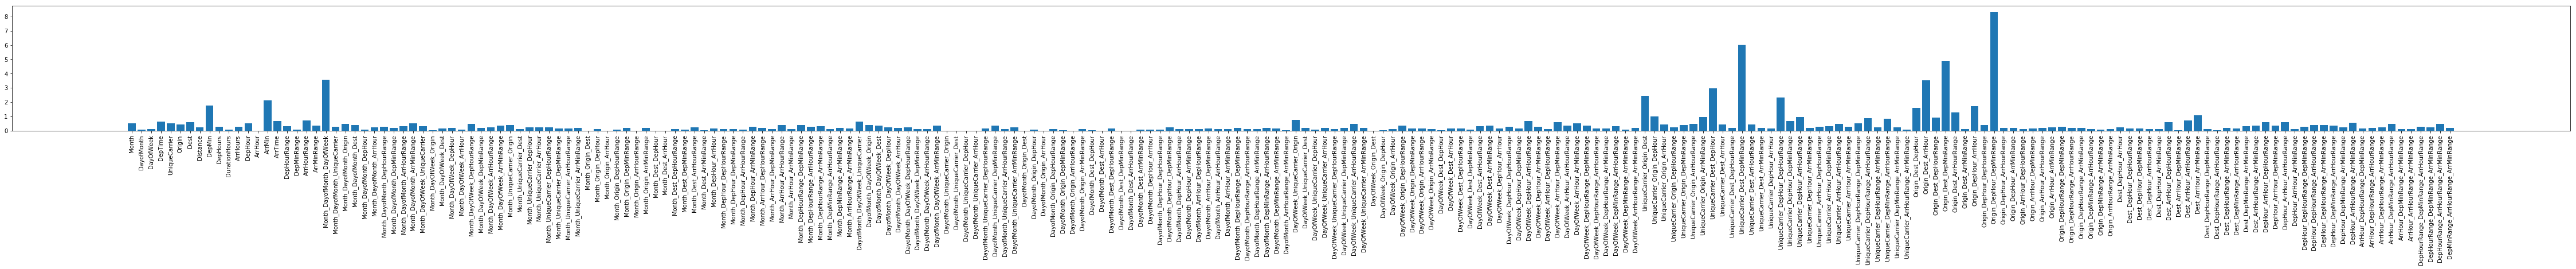

In [31]:
plt.figure(figsize=(80,4))
plt.bar(test_df.columns, ctb.get_feature_importance())
plt.xticks(rotation=90)
plt.show()

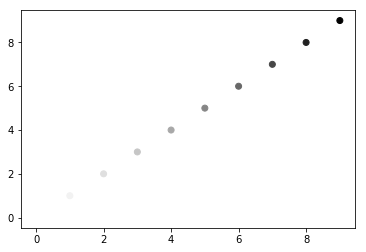

In [32]:
plt.scatter(range(10), range(10), c=range(10), cmap='Greys')
plt.show()

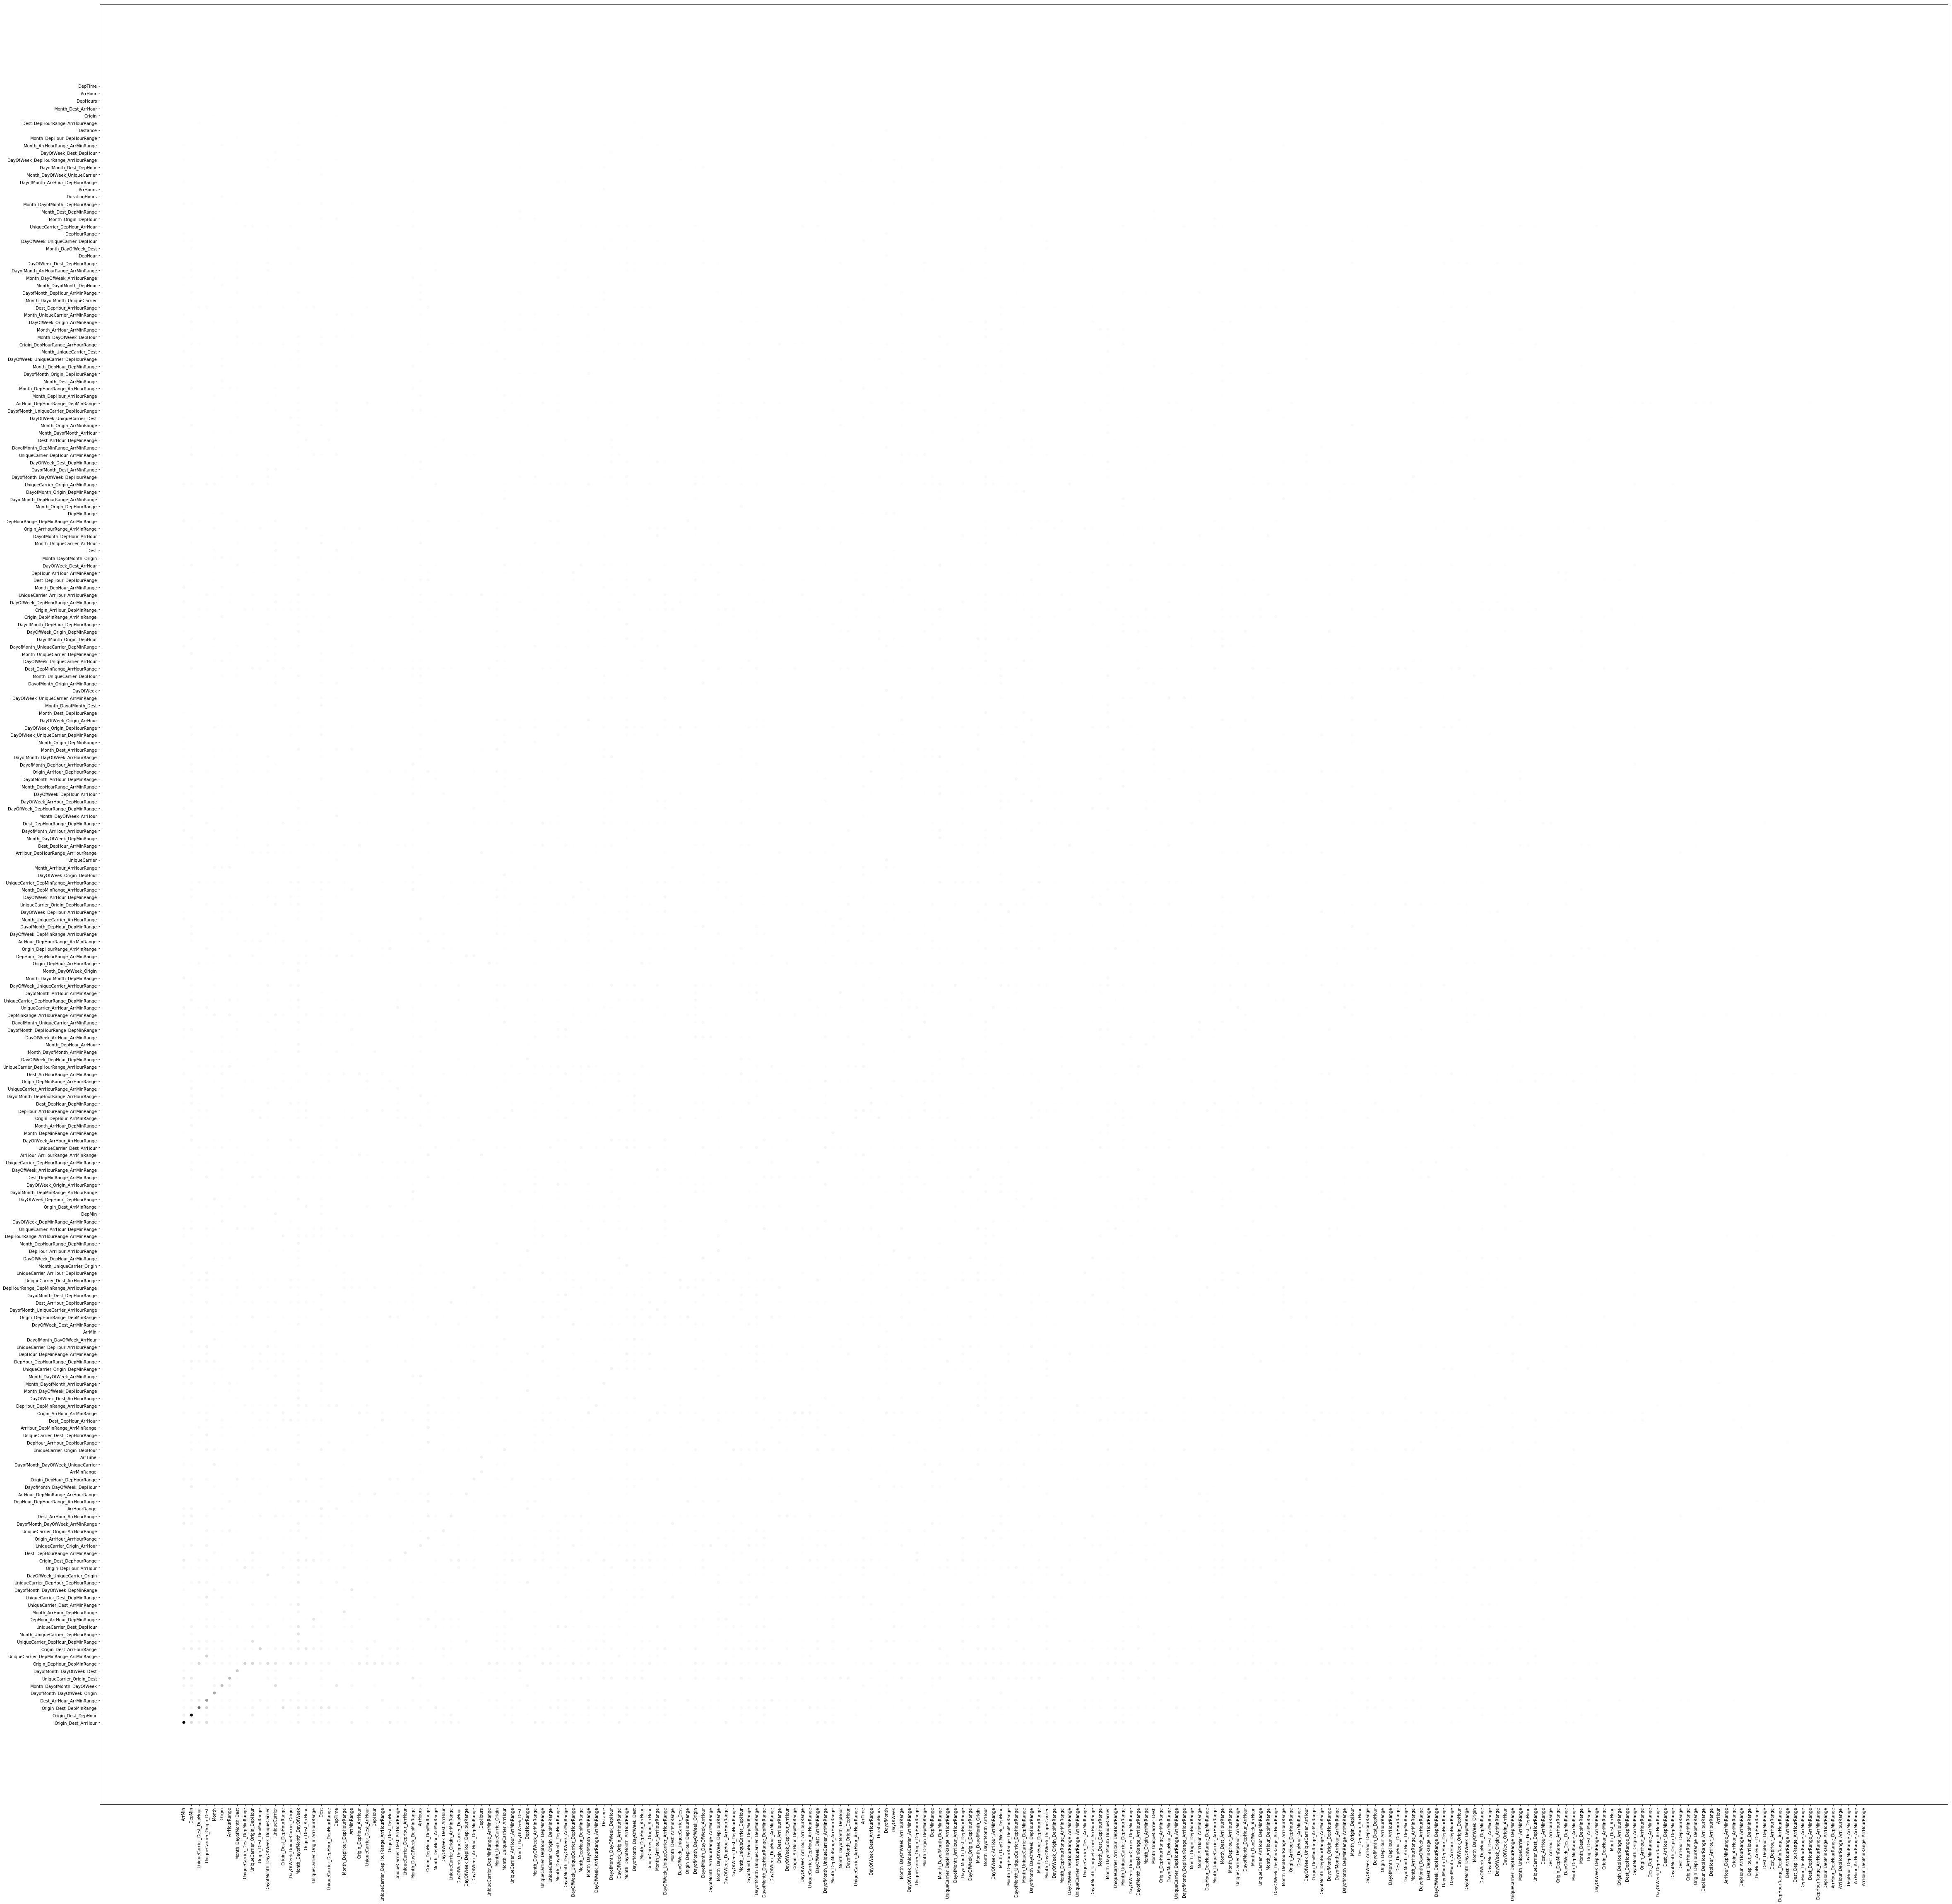

In [33]:
feat_int_imp = ctb.get_feature_importance(type='Interaction')
plt.figure(figsize=(80,80))
plt.scatter([test_df.columns[i] for i in feat_int_imp[:,0]], [test_df.columns[i] for i in feat_int_imp[:,1]], c=feat_int_imp[:,2], cmap='Greys')
plt.xticks(rotation=90)
plt.show()

**Train on the whole train set, make prediction on the test set. We got ~0.734 in the competition - "Catboost starter" baseline**

In [34]:
ctb.load_model('../input/mlcourse-ai-fall-2019-catboost/test.cbm')

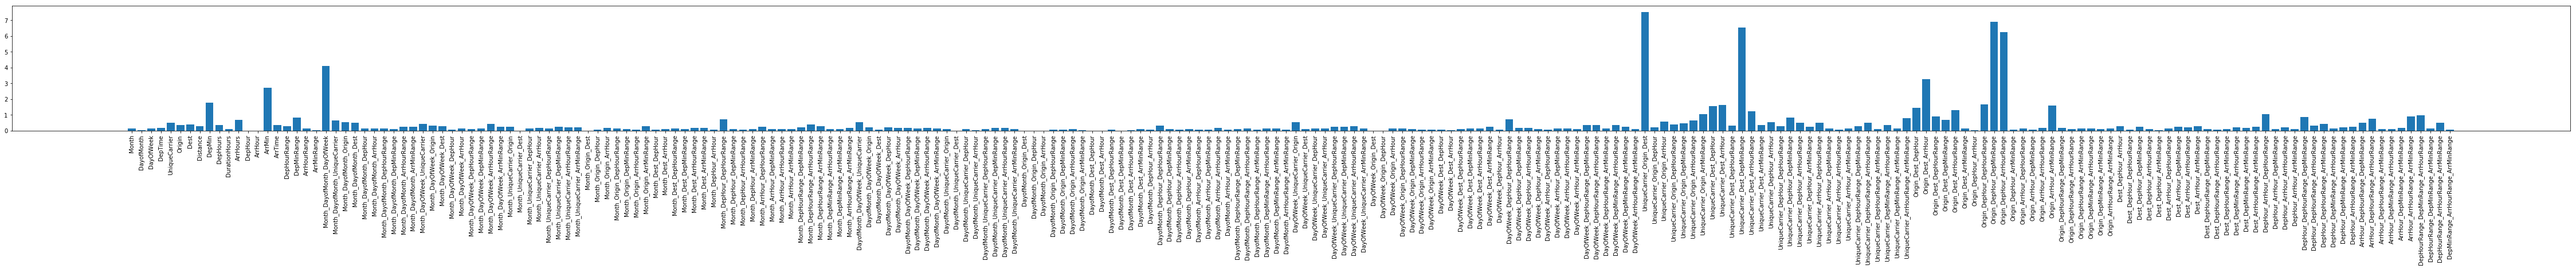

In [35]:
plt.figure(figsize=(80,4))
plt.bar(test_df.columns, ctb.get_feature_importance())
plt.xticks(rotation=90)
plt.show()

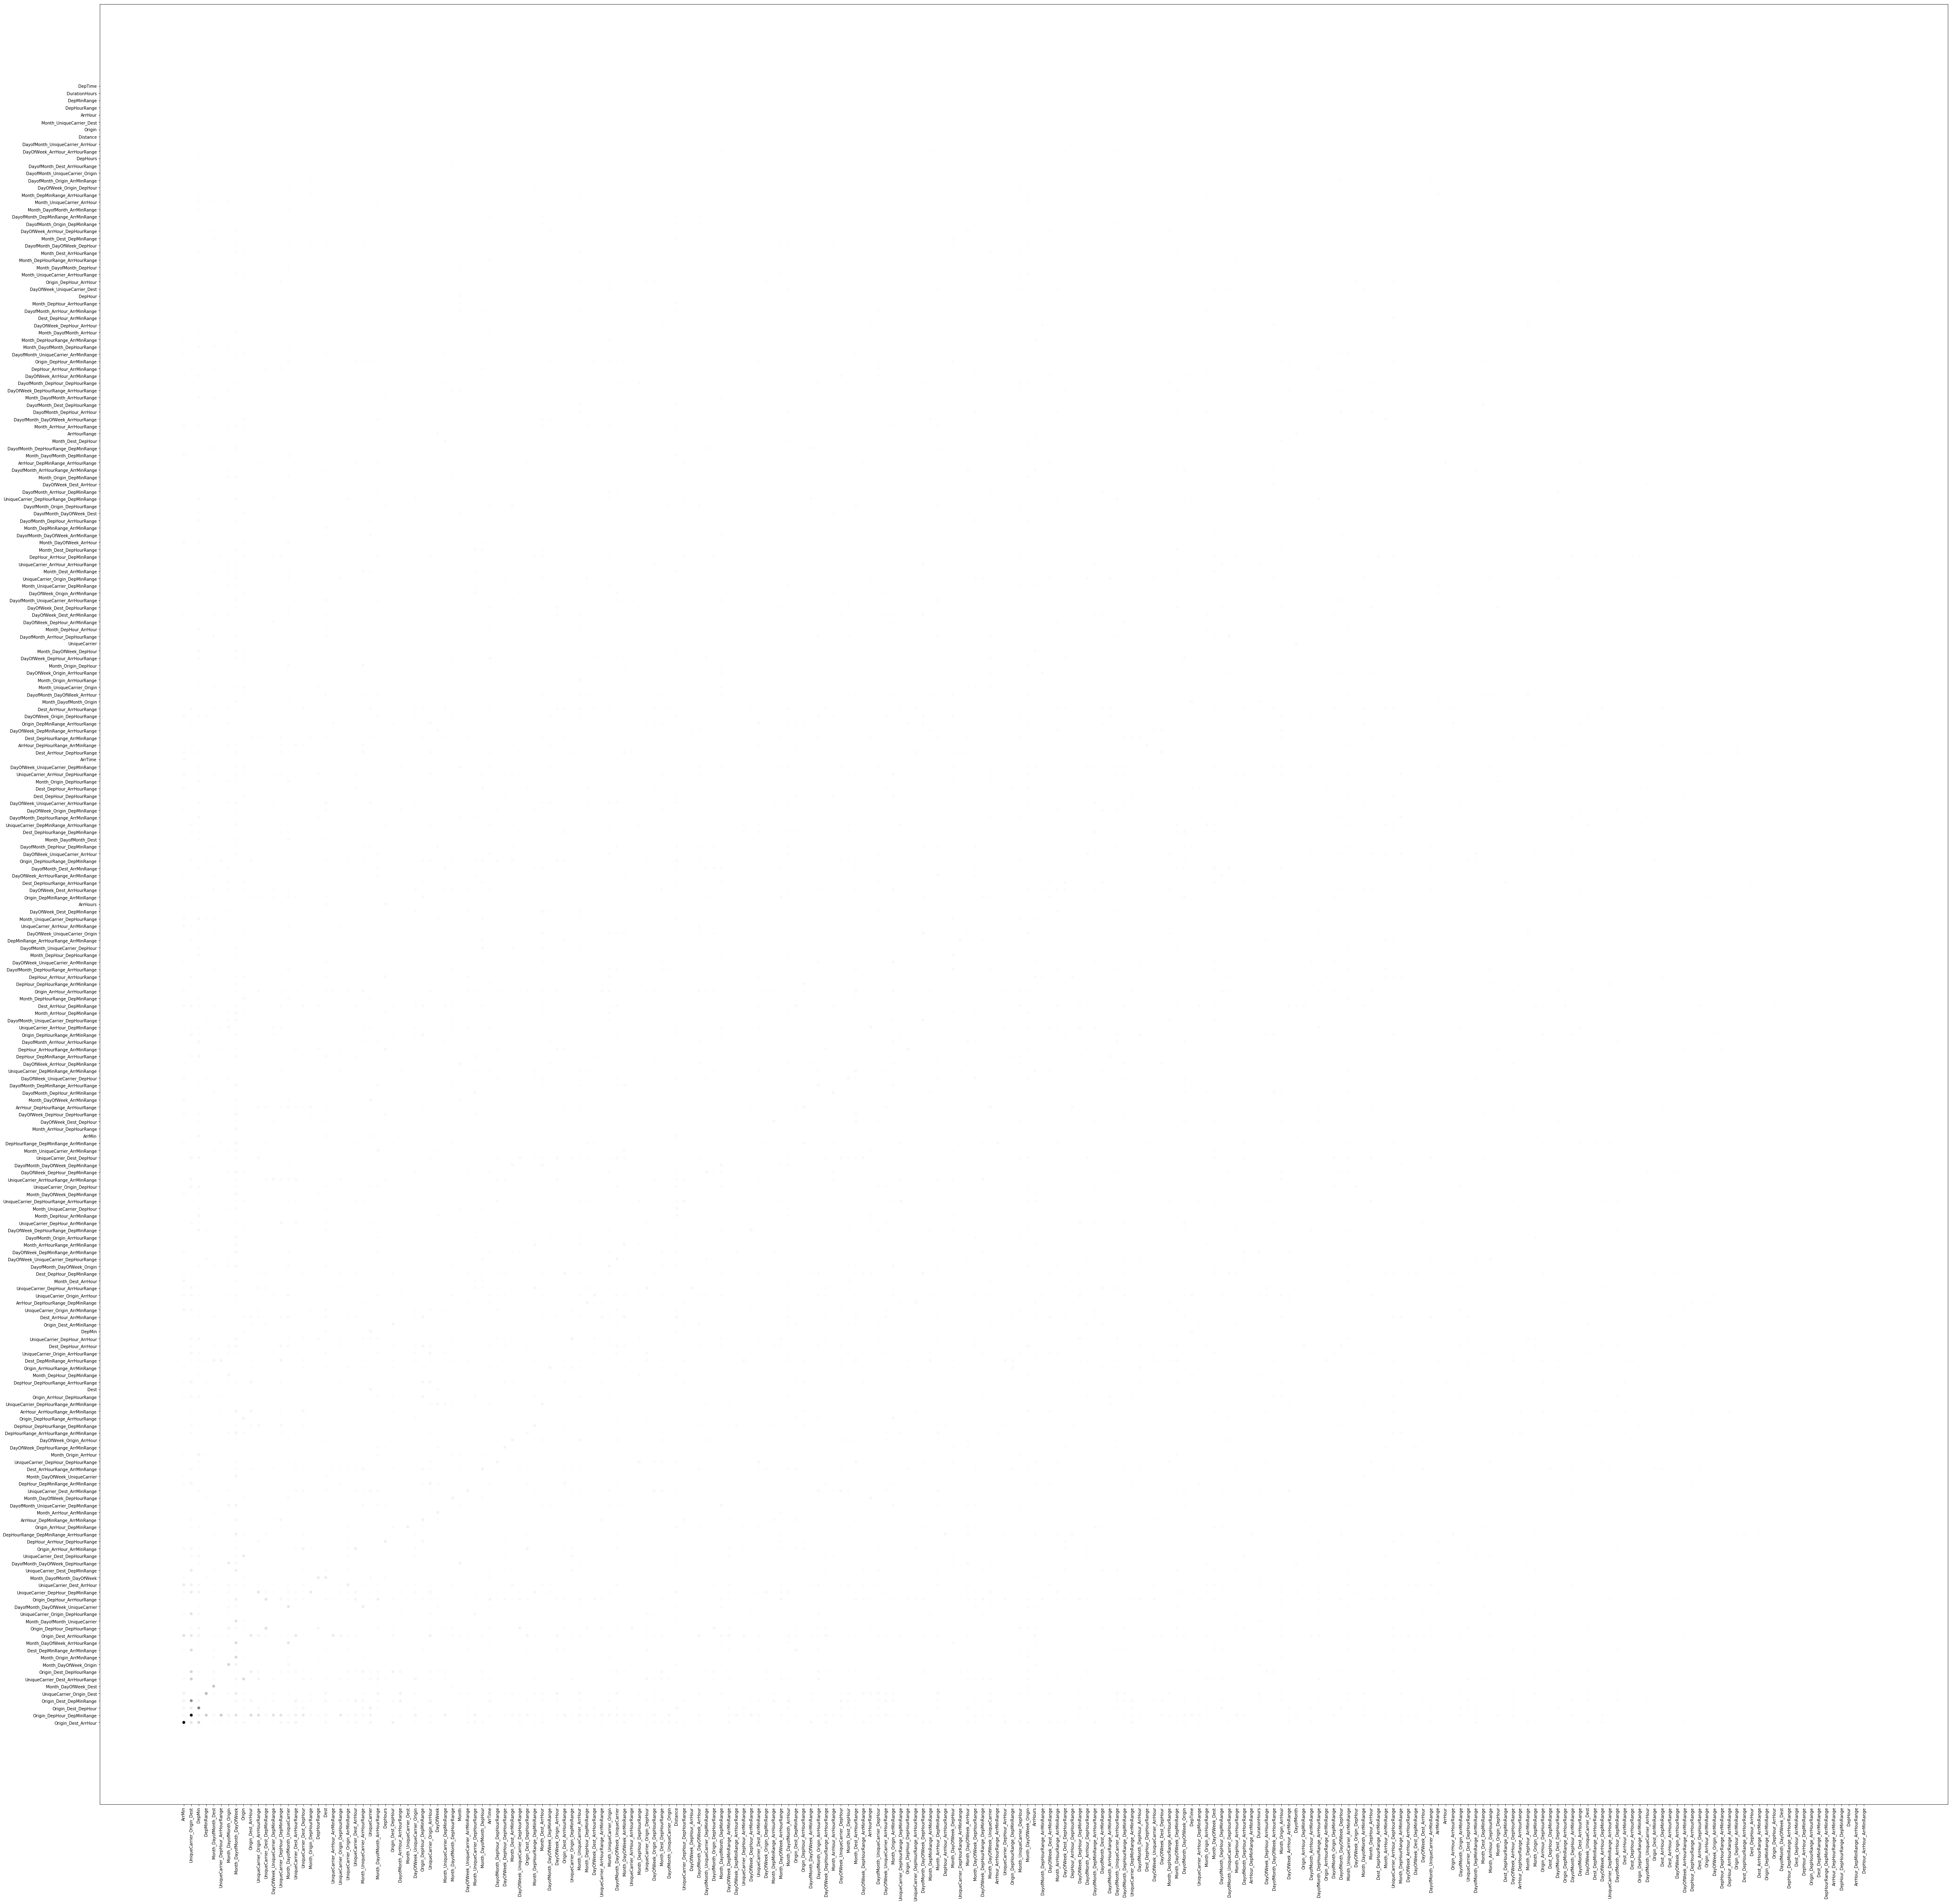

In [36]:
feat_int_imp = ctb.get_feature_importance(type='Interaction')
plt.figure(figsize=(80,80))
plt.scatter([test_df.columns[i] for i in feat_int_imp[:,0]], [test_df.columns[i] for i in feat_int_imp[:,1]], c=feat_int_imp[:,2], cmap='Greys')
plt.xticks(rotation=90)
plt.show()

In [2]:
# prepare Kaggle environment
!pwd
!mkdir working
!mkdir -p input/mlcourse-ai-fall-2019-catboost
import os
os.chdir('working')
!pwd
!wget -P ../input/mlcourse-ai-fall-2019-catboost/ 'https://www.kaggleusercontent.com/kf/21455932/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..enkeRnBil64C6i5AJqK7-w.OQoFnPicB6LN0yE7_0ToNg00Pk9Bs9D6a6tFdgfmcHJFkoJaL8Pc79244d9NFqPAs6F6nFkun1kBG2OCd8tdrRKL0xVV3eokDYbJ5RQXzs1LtyKQYqUP1kEmT4KoSqA3SZzDoa4DrNhz_1-EwNcarjFu45r4BYz7Ls1ChbVC8GQ.dMxoTllYehE_KzwDYAP_Iw/test.cbm'
!wget -P ../input/mlcourse-ai-fall-2019-catboost/ 'https://www.kaggleusercontent.com/kf/21455932/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..4TywmwM7Leelc_6PT32nBQ.Nn1b5EeFenN0DANOz-efT_FiZJNcIyfqbSEty-wSJIvihP7f5MD9arFKXlHKsnvxoqcYXuiWy1PV0yHFVUCid5TLJXvJmJ5eaUoPs9jyCvvzsAUSTW9co_9gzYwGGABmoIsAGNNT_6EKwMNs9RtqSOV7XlyKsXQCh97hA5VcRcA.j9VYK2m9hYgs6MYmkrY-9g/test.h5'
!wget -P ../input/mlcourse-ai-fall-2019-catboost/ 'https://www.kaggleusercontent.com/kf/21455932/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..L5wn991WmnGrosotVDi1wA.qSxiVJ-WWL4EvA0n-7FLggprMdzsFo64NekbnzBzqK8CzfE3W4Xgu5h_cbJSfkaxAfoqEt5hJyesK5zJ915mqjeT8e89zyYUW-v6ux1YvHh8XN-MNuYqzyebfILrBt9ANQVbnyOCEojtq3RGSPT9WTqTlXkPymLpKhJWmg4geAc.PQUK68gqo6383lJDcBIVTQ/train.cbm'
!wget -P ../input/mlcourse-ai-fall-2019-catboost/ 'https://www.kaggleusercontent.com/kf/21455932/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..UiXEnOlAHvupg4MWCAldNg.zPHHE9aEM8E767L77X7ANqUZza278Z95e8fIgWy8obxSGNrnJRRARRTwRMaJwg3HBaHQTW4T7kcmEPygTvwr6wZcHIB3R6JNPDBWi8MESuhN_DAyxijx-Muh2-P_c42TjTVA-puNLLXlIh_XAqwN-Tin3VHgWPcfml0ROluMocs.-_DGhk_qtlqMp0xv9-rYfA/train.h5'
!pip install catboost
!pip uninstall -y tables
!pip install tables

/content
/content/working
--2019-10-03 19:49:47--  https://www.kaggleusercontent.com/kf/21455932/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Zbt0oefC_pktm3l6nahakQ.T2kTQwiAfd4iDojEF27LXTSDtY8BaKB3wCzehcN9LW6IKArWkiaqE_LgnPdX08ivA9XVHsjEknhVjYOi9tiCqizm15ZqXmGtMtXNaGeLaaBffhnEQEKgyBp5BPqO7svtdiMKx6rDSOzdSQEHy78gwOVHJMPF9vAdfZYWndLRjME.mFbBnR4-FWifeRMMA7fW0g/train.h5
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleusercontent.com (www.kaggleusercontent.com)|35.190.26.106|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-10-03 19:49:48 ERROR 403: Forbidden.

--2019-10-03 19:49:49--  https://www.kaggleusercontent.com/kf/21455932/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Zbt0oefC_pktm3l6nahakQ.T2kTQwiAfd4iDojEF27LXTSDtY8BaKB3wCzehcN9LW6IKArWkiaqE_LgnPdX08ivA9XVHsjEknhVjYOi9tiCqizm15ZqXmGtMtXNaGeLaaBffhnEQEKgyBp5BPqO7svtdiMKx6rDSOzdSQEHy78gwOVHJMPF9vAdfZYWndLRjME.mFbBnR4-FWifeRMMA7fW0g/test.h5
Re

In [1]:
# prepare Kaggle envirnment after restart
!pwd
import os
os.chdir('working')
!pwd

/content


FileNotFoundError: ignored